# File to update variables and plot the bigwaves (not normalized)

In [2]:
 %pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from pylab import *
from scipy import *
from scipy import stats, io
import numpy as np
import struct
import tables as tb
from attrdict import AttrDict
import matplotlib.pyplot as plt
import os as os
from phy.io import KwikModel
import codecs as codecs
import matplotlib.gridspec as gridspec
import matplotlib.ticker as mtick

In [4]:
#----------------------------------------------------------------------------------------
#SAVING BINARY OBJECTS DATA
#need to automate data folder creation
#----------------------------------------------------------------------------------------
import pickle 

def save_obj(obj, name ):
    with open( name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open( name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [128]:
#----------------------------------------------------------------------------------------
# READ KWIK WAVE INFO
def spikekwikwaveinfo(kwik,expe,meas, grupete=2,samples=48,electrodes=8):
    model = KwikModel(kwik) # load kwik model from file
    spiketimes = model.spike_times # extract the absolute spike times
    clusters = model.cluster_groups # extract the cluster names
    #sample_rate = model.sample_rate # extract sampling freq
    waveforms = model.waveforms
    
    wavedata = dict()
    
    for cluster in clusters.keys():
        clustergroup = clusters[cluster]
        if clustergroup==grupete: # only look at specified type of cluster, 0 = noise, 1 = MUA, 2 = GOOD, 3 = unsorted
            
            wavematrix = AttrDict({'spike_times': spiketimes[where(model.spike_clusters==cluster)]})
            wavematrix.update(AttrDict({'Nspikes': len(wavematrix.spiketimes)}))
            codename = 'exp'+ str(expe) + '_' +meas + '_c' + str(cluster)
            
                
            wavedata[codename] = wavematrix
            # attribute accessible means that spikedata.spike_times works, normal dictionaries would be spikedata[spike_times]
    
    
    model.close()
    return wavedata

# Experiment Files and Folders

In [159]:
# In this cell you put all the information to make the code portable from computer to computer
# You have to place all the file names and experiments, then you loop whichever you want to analyse
#--------------------------------------------------------------------------------
#Experiment numbers
ExpeNum = [20,22,23,24,26,27,28,29,30,31,32]

#--------------------------------------------------------------------------------
#Folders for measurements and experiments (this is how we separate shanks in folders for individual analyses)
m164 = ['m1s1','m1s2','m1s3','m1s4','m1s5','m1s6','m1s7','m1s8']
m264 = ['m2s1','m2s2','m2s3','m2s4','m2s5','m2s6','m2s7','m2s8']
m364 = ['m3s1','m3s2','m3s3','m3s4','m3s5','m3s6','m3s7','m3s8']
m464 = ['m4s1','m4s2','m4s3','m4s4','m4s5','m4s6','m4s7','m4s8']

#--------------------------------------------------------------------------------
#Kwik files    

files20 = [ 'MEAS-150707-1_ele01_ele08.kwik',
            'MEAS-150707-1_ele09_ele16.kwik',
            'MEAS-150707-1_ele17_ele24.kwik',
            'MEAS-150707-1_ele25_ele32.kwik',
            'MEAS-150707-23_ele01_ele08.kwik',
            'MEAS-150707-23_ele16_ele09.kwik']#,
            #'MEAS-150707-23_ele17_ele24.kwik',  not in S2
            #'MEAS-150707-23_ele25_ele32.kwik',] not in S2

files22 = [ 'MEAS-150716-12_ele01_ele08.kwik',
            'MEAS-150716-12_ele09_ele16.kwik',
            'MEAS-150716-12_ele17_ele24.kwik',
            'MEAS-150716-12_ele25_ele32.kwik',
            'MEAS-150716-3_ele01_ele08.kwik',
            'MEAS-150716-3_ele09_ele16.kwik',
            'MEAS-150716-3_ele17_ele24.kwik',
            'MEAS-150716-3_ele25_ele32.kwik',]

files23 = [ 'MEAS-151027-1_ele01_ele08.kwik',
            'MEAS-151027-1_ele09_ele16.kwik',
            #'MEAS-151027-1_ele17_ele24.kwik', out of S2
            #'MEAS-151027-1_ele25_ele32.kwik', out of S2
            #'MEAS-151027-1_ele33_ele40.kwik', out of S2
            #'MEAS-151027-1_ele41_ele48.kwik', out of S2
            #'MEAS-151027-1_ele49_ele56.kwik', out of S2
            #'MEAS-151027-1_ele57_ele64.kwik', out of S2
            'MEAS-151027-2_ele01_ele08.kwik',
            'MEAS-151027-2_ele09_ele16.kwik',
            'MEAS-151027-2_ele17_ele24.kwik',
            'MEAS-151027-2_ele25_ele32.kwik',
            'MEAS-151027-2_ele33_ele40.kwik']#,
            #'MEAS-151027-2_ele41_ele48.kwik',  out of S2
            #'MEAS-151027-2_ele49_ele56.kwik',  out of S2
            #'MEAS-151027-2_ele57_ele64.kwik']  out of S2

files24 = [#'MEAS-151103-1_EXTRACTED_ele25_ele32.kwik',  no functional responses
           'MEAS-151103-1_EXTRACTED_ele33_ele40.kwik',  
           'MEAS-151103-1_EXTRACTED_ele41_ele48.kwik',  
           'MEAS-151103-1_EXTRACTED_ele49_ele56.kwik',  
           'MEAS-151103-1_EXTRACTED_ele57_ele64.kwik',
           #'MEAS-151103-2_ele33_ele40.kwik',   no units
           'MEAS-151103-2_ele41_ele48.kwik',
           'MEAS-151103-2_ele49_ele56.kwik',
           'MEAS-151103-2_ele57_ele64.kwik']

#OUT OF S2
#files25 = [ 'MEAS-151105-1good_ele01_ele08.kwik',
#            'MEAS-151105-1good_ele09_ele16.kwik',
#            'MEAS-151105-1good_ele17_ele24.kwik',
#            'MEAS-151105-1good_ele25_ele32.kwik',
#            'MEAS-151105-1good_ele33_ele40.kwik',
#            'MEAS-151105-1good_ele41_ele48.kwik',
#            'MEAS-151105-1good_ele49_ele56.kwik',
#            'MEAS-151105-1good_ele57_ele64.kwik',
#            'MEAS-151105-2_ele01_ele08.kwik',
#            'MEAS-151105-2_ele09_ele16.kwik',
#            'MEAS-151105-2_ele17_ele24.kwik',
#            'MEAS-151105-2_ele25_ele32.kwik',
#            'MEAS-151105-2_ele33_ele40.kwik',
#            'MEAS-151105-2_ele41_ele48.kwik',
#            'MEAS-151105-2_ele49_ele56.kwik',
#            'MEAS-151105-2_ele57_ele64.kwik']

files26 = [ 'MEAS-151110-1_ele01_ele08.kwik',
            'MEAS-151110-1_ele09_ele16.kwik',
            'MEAS-151110-1_ele17_ele24.kwik',
            'MEAS-151110-1_ele25_ele32.kwik',
            'MEAS-151110-1_ele33_ele40.kwik',
            'MEAS-151110-1_ele41_ele48.kwik',
            'MEAS-151110-1_ele49_ele56.kwik',
            #'MEAS-151110-1_ele57_ele64.kwik', out of S2
            'MEAS-151110-2_ele01_ele08.kwik',
            'MEAS-151110-2_ele09_ele16.kwik',
            'MEAS-151110-2_ele17_ele24.kwik',
            'MEAS-151110-2_ele25_ele32.kwik']#,
            #'MEAS-151110-2_ele33_ele40.kwik',  no units
            #'MEAS-151110-2_ele41_ele48.kwik', out of S2
            #'MEAS-151110-2_ele49_ele56.kwik', no units
            #'MEAS-151110-2_ele57_ele64.kwik', no units
            #'MEAS-151110-3_ele01_ele08.kwik',  out of S2
            #'MEAS-151110-3_ele09_ele16.kwik',  out of S2
            #'MEAS-151110-3_ele17_ele24.kwik',  out of S2
            #'MEAS-151110-3_ele25_ele32.kwik',  out of S2
            #'MEAS-151110-3_ele33_ele40.kwik',  out of S2
            #'MEAS-151110-3_ele41_ele48.kwik',  out of S2
            #'MEAS-151110-3_ele49_ele56.kwik',  no units
            #'MEAS-151110-3_ele57_ele64.kwik']  no units

files27  = ['MEAS-151112-1_ele01_ele08.kwik',
            'MEAS-151112-1_ele09_ele16.kwik',
            'MEAS-151112-1_ele17_ele24.kwik',
            'MEAS-151112-1_ele25_ele32.kwik',
            'MEAS-151112-1_ele33_ele40.kwik',
            'MEAS-151112-1_ele41_ele48.kwik',
            'MEAS-151112-1_ele49_ele56.kwik',
            'MEAS-151112-1_ele57_ele64.kwik',
            'MEAS-151112-2_ele01_ele08.kwik',
            'MEAS-151112-2_ele09_ele16.kwik',
            'MEAS-151112-2_ele17_ele24.kwik',
            'MEAS-151112-2_ele25_ele32.kwik',
            'MEAS-151112-2_ele33_ele40.kwik',
            'MEAS-151112-2_ele41_ele48.kwik',
            'MEAS-151112-2_ele49_ele56.kwik',
            'MEAS-151112-2_ele57_ele64.kwik',
            'MEAS-151112-3_ele01_ele08.kwik',
            'MEAS-151112-3_ele09_ele16.kwik',
            'MEAS-151112-3_ele17_ele24.kwik',
            'MEAS-151112-3_ele25_ele32.kwik',
            'MEAS-151112-3_ele33_ele40.kwik',
            'MEAS-151112-3_ele41_ele48.kwik',
            'MEAS-151112-3_ele49_ele56.kwik',
            'MEAS-151112-3_ele57_ele64.kwik']

files28 =  ['MEAS-151116-1_ele01_ele08.kwik',
            'MEAS-151116-1_ele09_ele16.kwik',
            'MEAS-151116-1_ele17_ele24.kwik',
            'MEAS-151116-1_ele25_ele32.kwik',
            'MEAS-151116-1_ele33_ele40.kwik',
            'MEAS-151116-1_ele41_ele48.kwik',
            'MEAS-151116-1_ele49_ele56.kwik',
            #'MEAS-151116-1_ele57_ele64.kwik',
            'MEAS-151116-2_ele01_ele08.kwik',
            'MEAS-151116-2_ele09_ele16.kwik',
            'MEAS-151116-2_ele17_ele24.kwik',
            'MEAS-151116-2_ele25_ele32.kwik',
            'MEAS-151116-2_ele33_ele40.kwik',
            'MEAS-151116-2_ele41_ele48.kwik',
            'MEAS-151116-2_ele49_ele56.kwik',
            'MEAS-151116-2_ele57_ele64.kwik',
            'MEAS-151116-3_ele01_ele08.kwik',
            'MEAS-151116-3_ele09_ele16.kwik',
            'MEAS-151116-3_ele17_ele24.kwik',
            'MEAS-151116-3_ele25_ele32.kwik',
            'MEAS-151116-3_ele33_ele40.kwik',
            'MEAS-151116-3_ele41_ele48.kwik',
            'MEAS-151116-3_ele49_ele56.kwik',
            'MEAS-151116-3_ele57_ele64.kwik']

files29  = ['MEAS-151118-1_ele01_ele08.kwik',
            'MEAS-151118-1_ele09_ele16.kwik',
            'MEAS-151118-1_ele17_ele24.kwik',
            'MEAS-151118-1_ele25_ele32.kwik',
            'MEAS-151118-1_ele33_ele40.kwik',
            'MEAS-151118-1_ele41_ele48.kwik',
            'MEAS-151118-1_ele49_ele56.kwik',
            'MEAS-151118-1_ele57_ele64.kwik',
            'MEAS-151118-2_ele01_ele08.kwik',
            'MEAS-151118-2_ele09_ele16.kwik',
            'MEAS-151118-2_ele17_ele24.kwik',
            'MEAS-151118-2_ele25_ele32.kwik',
            'MEAS-151118-2_ele33_ele40.kwik',
            'MEAS-151118-2_ele41_ele48.kwik',
            'MEAS-151118-2_ele49_ele56.kwik',
            'MEAS-151118-2_ele57_ele64.kwik',
            'MEAS-151118-3_ele01_ele08.kwik',
            'MEAS-151118-3_ele09_ele16.kwik',
            'MEAS-151118-3_ele17_ele24.kwik',
            'MEAS-151118-3_ele25_ele32.kwik',
            'MEAS-151118-3_ele33_ele40.kwik',
            'MEAS-151118-3_ele41_ele48.kwik',
            'MEAS-151118-3_ele49_ele56.kwik',
            'MEAS-151118-3_ele57_ele64.kwik']


files30  = ['MEAS-151208-2_ele01_ele08.kwik',
            'MEAS-151208-2_ele09_ele16.kwik',
            'MEAS-151208-2_ele17_ele24.kwik',
            'MEAS-151208-2_ele25_ele32.kwik',
            'MEAS-151208-2_ele33_ele40.kwik',
            'MEAS-151208-2_ele41_ele48.kwik',
            'MEAS-151208-2_ele49_ele56.kwik',
            'MEAS-151208-2_ele57_ele64.kwik',
            'MEAS-151208-3_ele01_ele08.kwik',
            'MEAS-151208-3_ele09_ele16.kwik',
            'MEAS-151208-3_ele17_ele24.kwik',
            'MEAS-151208-3_ele25_ele32.kwik',
            'MEAS-151208-3_ele33_ele40.kwik',
            'MEAS-151208-3_ele41_ele48.kwik',
            'MEAS-151208-3_ele49_ele56.kwik',
            'MEAS-151208-3_ele57_ele64.kwik',
            'MEAS-151208-4_ele01_ele08.kwik',
            'MEAS-151208-4_ele09_ele16.kwik',
            'MEAS-151208-4_ele17_ele24.kwik',
            'MEAS-151208-4_ele25_ele32.kwik',
            'MEAS-151208-4_ele33_ele40.kwik',
            'MEAS-151208-4_ele41_ele48.kwik',
            'MEAS-151208-4_ele49_ele56.kwik',
            'MEAS-151208-4_ele57_ele64.kwik',
            'MEAS-151208-5_ele01_ele08.kwik',
            'MEAS-151208-5_ele09_ele16.kwik',
            'MEAS-151208-5_ele17_ele24.kwik',
            'MEAS-151208-5_ele25_ele32.kwik',
            'MEAS-151208-5_ele33_ele40.kwik',
            'MEAS-151208-5_ele41_ele48.kwik',
            'MEAS-151208-5_ele49_ele56.kwik',
            'MEAS-151208-5_ele57_ele64.kwik']


files31 = [ #'MEAS-151210-1_ele01_ele08.kwik',  no units
            #'MEAS-151210-1_ele09_ele16.kwik',  no units
            #'MEAS-151210-1_ele17_ele24.kwik',  no units
            #'MEAS-151210-1_ele25_ele32.kwik',  no units
            #'MEAS-151210-1_ele33_ele40.kwik',  no units
            'MEAS-151210-1_ele41_ele48.kwik',
            'MEAS-151210-1_ele49_ele56.kwik',
            'MEAS-151210-1_ele57_ele64.kwik',
            #'MEAS-151210-2_ele01_ele08.kwik',   out of S2
            #'MEAS-151210-2_ele09_ele16.kwik',   out of S2
            #'MEAS-151210-2_ele17_ele24.kwik',   out of S2
            #'MEAS-151210-2_ele25_ele32.kwik',   out of S2
            'MEAS-151210-2_ele33_ele40.kwik',
            'MEAS-151210-2_ele41_ele48.kwik',
            'MEAS-151210-2_ele49_ele56.kwik',
            'MEAS-151210-2_ele57_ele64.kwik',
            #'MEAS-151210-3_ele01_ele08.kwik',   out of S2
            #'MEAS-151210-3_ele09_ele16.kwik',   no units
            #'MEAS-151210-3_ele17_ele24.kwik',   no units
            #'MEAS-151210-3_ele25_ele32.kwik',   out of S2
            'MEAS-151210-3_ele33_ele40.kwik',
            'MEAS-151210-3_ele41_ele48.kwik',
            'MEAS-151210-3_ele49_ele56.kwik',
            'MEAS-151210-3_ele57_ele64.kwik']

files32 = [ 'MEAS-151214-1_ele01_ele08.kwik',
            'MEAS-151214-1_ele09_ele16.kwik',
            'MEAS-151214-1_ele17_ele24.kwik',
            'MEAS-151214-1_ele25_ele32.kwik',
            'MEAS-151214-1_ele33_ele40.kwik',
            'MEAS-151214-2_ele01_ele08.kwik',
            'MEAS-151214-2_ele09_ele16.kwik',
            'MEAS-151214-2_ele17_ele24.kwik',
            'MEAS-151214-2_ele25_ele32.kwik',
            'MEAS-151214-2_ele33_ele40.kwik']

#--------------------------------------------------------------------------------
#--------------------------------------------------------------------------------
# Here I create my dictionary of experiments
Expe={}
for num in ExpeNum: 
    Expe[num] = dict()
#---------------------------------------
i=0        
for meas in np.append(m164[0:4],m364[0:2]):
    Expe[20][meas] = files20[i]
    i+=1
#---------------------------------------
i=0 
for meas in np.append(m164[0:4],m364[0:4]):
    Expe[22][meas] = files22[i]
    i+=1
#---------------------------------------
i=0 
for meas in np.append(m164[0:2],m264[0:5]):
    Expe[23][meas] = files23[i]
    i+=1
#---------------------------------------
i=0
for meas in np.append(m164[4:8],m264[5:8]):    
    Expe[24][meas] = files24[i]
    i+=1
#---------------------------------------
#i=0 
#for meas in np.append(m164,m264):    
#    Expe[25][meas] = files25[i]
#    i+=1
#---------------------------------------
i=0
for meas in np.append(m164[0:7],m264[0:4]):
    Expe[26][meas] = files26[i]
    i+=1
#---------------------------------------
i=0
for meas in np.append(np.append(m164[0:7],m264),m364):    
    Expe[28][meas] = files28[i]
    i+=1
#---------------------------------------    
i=0
for meas in np.append(np.append(m164,m264),m364):    
    Expe[27][meas] = files27[i]
    Expe[29][meas] = files29[i]
    Expe[30][meas] = files30[i]
    i+=1
#---------------------------------------    
for meas in m464:
    Expe[30][meas] = files30[i]
    i+=1
i=0
#---------------------------------------    
i=0
for meas in np.append(np.append(m164[5:8],m264[4:8]),m364[4:8]):    
    Expe[31][meas] = files31[i]
    i+=1
i=0
#---------------------------------------    
for meas in np.append(m164[0:5],m264[0:5]):
    Expe[32][meas] = files32[i]
    i+=1

#--------------------------------------------------------------------------------
#Initialize wave features dictionary
Wavedata = dict()


#--------------------------------------------------------------------------------
#Root folder to work in, such all will be in subfolders 
fileswaves={}

filespikes={}

rootF = '/home/matias/WORKSPACE/'    

FolderWaves = '/home/matias/WORKSPACE/S2_git/'    
for i in ExpeNum:
    fileswaves[i] = 'wavedata' + str(i)
    filespikes[i] = 'wavedataspikes' + str(i)

# DISPLAYING FUNCTIONS

In [6]:
#----------------------------------------------------------------------------------------
# DISPLAY WAVES
#----------------------------------------------------------------------------------------
# Plot
def display_waves(expe,wavedata,fig,inner_grid,neuron,meas) :
                  
    fig2 = figure()
    ax = fig2.add_subplot(1,1,1)
        
    electrodes = [0,7,1,6,2,5,3,4]
    eleclinear = [2,6,1,5,3,7,0,4]
    
    electrodes_shank1_bad3 = [0,6,1,5,8,4,2,3]
    electrodes_shank7_bad6 = [0,6,1,8,2,5,3,4]

    #[2,1,3,0,4,7,5,6]
    #---------------------------------
    buzsaki= True
    if int(expe)==20: buzsaki = False
    
    if buzsaki:
        elec = electrodes
    else:
        elec = eleclinear
        
    if int(meas[3])==1 and expe<=28 and expe>=23:
        elec = electrodes_shank1_bad3
    
    if int(meas[3])==7 and expe<=31 and expe>=30:
        elec = electrodes_shank7_bad6
    
    #---------------------------------
    i=0
    origin=0
    ymin=-600    
    ymax= 400
    if np.min(wavedata.meanwave[:]) < ymin:
            ymin = np.min(wavedata.meanwave[:])*1.2
    if np.max(wavedata.meanwave[:]) > ymax:            
            ymax = np.max(wavedata.meanwave[:])*1.2
            
    for i in range(1) :
        if i==0:
            ax1 = Subplot(fig, inner_grid[i])   
            ax1.set_xticks([])
            #ax1.set_yticks([])
            ax1.spines['right'].set_visible(False)
            ax1.spines['top'].set_visible(False)
            #ax1.spines['left'].set_visible(False)
            ax1.spines['bottom'].set_visible(False)
            ax1.set_yticklabels([])
        else :
            #subplot(5,5,i+1,sharex=ax1,sharey=ax1,frame_on=False)
            ax1 = Subplot(fig,inner_grid[i],sharex=ax1,sharey=ax1)
            ax1.set_xticks([])
            #ax1.set_yticks([])
            ax1.spines['right'].set_visible(False)
            ax1.spines['top'].set_visible(False)
            #ax1.spines['left'].set_visible(False)
            ax1.spines['bottom'].set_visible(False)
            ax1.set_yticklabels([])
        
        if elec[i]==8: continue
        
        m =wavedata.bigwave
        s =wavedata.bigwavestd
            
        step=0
        if buzsaki:
            if i%2==1:
                m=m-step
                origin = (-step)
            else: 
                m = m + step
                origin = step

        if m.size :
            ax1.plot(arange(48),m,color='red')
            ax1.plot(arange(48),m+s,color='gray')
            ax1.plot(arange(48),m-s,color='gray')     
            
            
            width = wavedata.params[0]
            cross = wavedata.params[1]
            crossrel = wavedata.params[2]
            peaksV = wavedata.params[3]
            peaks = wavedata.params[4]
            peaksrel = wavedata.params[5]
            mins = wavedata.params[6]

            ax1.plot(cross,[0,0],'o',markersize=3)
            ax1.plot(peaks,np.array(peaksV)*mins[1],'o',markersize=3)
            ax1.plot(mins[0],mins[1],'o',markersize=3)

            ax1.plot([cross[0],cross[0]+width[0]],[5,5],'r')
            ax1.plot([cross[0]+0.5,cross[0]+width[1]+0.5],np.array([1,1])*mins[1]/4,'r')
            ax1.plot([cross[0]+1,cross[0]+width[2]+1],np.array([1,1])*mins[1]/2,'r')
            

        ax1.axhline(origin, color = 'k', linewidth=1)
        
        ax1.set_xlim([0, 47])
        ax1.set_ylim([ymin, ymax])
            
        if i ==0: ax1.set_title('               Nrn' + str(wavedata.clusnum)+  '   y='+str(ymin)[0:5] + ' - '+str(ymax)[0:3] ,fontsize=9)
                                                 
        fig.add_subplot(ax1)

#----------------------------------------------------------------------------------------
def display_all_Waves_of_recording(expe,wavedata,neuron_list,counts,pdf_files_directory,grupete,titles,meas) :
    
    fig = plt.figure(figsize=(12,16.5))
    nrns = counts
    if nrns <31: 
        layout = [5,6]
    else: layout = [nrns//6+(nrns%6!=0),6]
    outer_grid = gridspec.GridSpec(layout[0], layout[1], wspace=0.2, hspace=0.2)
    
    ii=0
       
    orderneurons = np.sort(list(neuron_list.keys())) #np.sort(list(histdata.keys()))
    for neuron in orderneurons:
        
        neuronkey = neuron_list[neuron]                       
        clf()
                    
        inner_grid = gridspec.GridSpecFromSubplotSpec(1,1,subplot_spec=outer_grid[ii], wspace=0.1,hspace=0.1)
               
        display_waves(expe,wavedata[neuronkey],fig,inner_grid,neuron,meas)                               
        
        fig.suptitle(titles + '_WaveMeanMax' ,fontsize=16)
        
        ii+=1
        
        fig.savefig(pdf_files_directory + titles + '_wavemax.pdf', format='pdf')
        
    clf()



# Get correct params Waves

In [129]:
#GET WAVE PARAMS
def Getwaveparams2(Waves):
    
    #here I get the peak to peak maximum
    p2p = amax(Waves,0)-amin(Waves,0)
       
    #here I get the electrode number of biggest waveform
    electrode = where(p2p==max(p2p))[0][0]
    
    #I use the biggest waveform, already corrected for 0
    Wave = Waves[:,electrode]
    
    #I get the minimum
    minimo = min(Wave)
    
    plot(Wave)
    plot(arange(48),0*arange(48))
    
    #I find max and min 
    minim = where(Wave== minimo)[0][0]
    table_max = where(numpy.r_[False, Wave[1:] > Wave[:-1]] & numpy.r_[Wave[:-1] > Wave[1:], False])[0]

    #have to get local max before minimum and after minimum
    tablebefore = table_max[where(table_max<minim)]
    tableafter = table_max[where(table_max>minim)]
    
    #--------------------------------------------------------------------    
    if len(tablebefore)<1:
        peak1 = 0   #if there is no second peak, i select the las point
    else:
        #peak2 = table_max[1] 
        peak1 =  table_max[Wave[table_max] == max(Wave[tablebefore])][0]
    peak1val = Wave[peak1]/minimo
    #--------------------------------------------------------------------
    if len(tableafter)<1:
        peak2 = 47   #if there is no second peak, i select the las point
    else:
        #peak2 = table_max[1] 
        peak2 =  table_max[Wave[table_max] == max(Wave[tableafter])][0]
    peak2val = Wave[peak2]/minimo
    #--------------------------------------------------------------------
    
    #relative to minimum
    prel1 = peak1 - minim
    prel2 = peak2 -minim
            
    #I find previous index of 0 crossings
    table_0d = where(numpy.r_[Wave[1:] <= 0,False] & numpy.r_[Wave[:-1]>0,False])[0]
    table_0u = where(numpy.r_[Wave[1:] >= 0,False] & numpy.r_[Wave[:-1]<0,False])[0]
    
    c1 = table_0d[0]
    c2 = table_0u[0]

    if c2<minim:#if there is an extra crossing
        #c1 = table_0d[1]
        c2 = table_0u[1]
    #--------------------------------------------------------------------    
    if len(table_0d)<2:
        c3 = 47   #if there is no second cross
    else:
        c3 =  table_0d[len(table_0d)-1] 
      
    #get 0 crossings
    cr1 = c1+abs(Wave[c1])/(abs(Wave[c1])+abs(Wave[c1+1]))
    cr2 = c2+abs(Wave[c2])/(abs(Wave[c2])+abs(Wave[c2+1]))
    
    widthtot = c3-cr1
    
    if c3==47 and Wave[c3-2]>Wave[c3]: 
        cr3 = c3 + Wave[c3]*2/(Wave[c3-2]-Wave[c3])
    else:
        cr3 = c3
        
    if cr3> 65: cr3=65
    
    #relative to minimum
    crel1 = cr1-minim
    crel2 = cr2-minim
    crel3 = cr3-minim
    
    #Get the widths
    width0 = cr2-cr1
    widthtotint = cr3-cr1
    
    amp50 = minimo/2
    amp25 = minimo/4
    
    #get the amplitude crossings
    table_0d = where(numpy.r_[Wave[1:] <= amp50,False] & numpy.r_[Wave[:-1]>amp50,False])[0]
    table_0u = where(numpy.r_[Wave[1:] >= amp50,False] & numpy.r_[Wave[:-1]<amp50,False])[0]
        
    c1 = table_0d[0]
    c2 = table_0u[0]
    
    cross1 = c1+abs(amp50-Wave[c1])/(abs(Wave[c1]-Wave[c1+1]))
    cross2 = c2+abs(amp50-Wave[c2])/(abs(Wave[c2]-Wave[c2+1]))
        
    width50 = cross2-cross1
    #---------------------------------
    
    table_0d = where(numpy.r_[Wave[1:] <= amp25,False] & numpy.r_[Wave[:-1]>amp25,False])[0]
    table_0u = where(numpy.r_[Wave[1:] >= amp25,False] & numpy.r_[Wave[:-1]<amp25,False])[0]
    
    c1 = table_0d[0]
    c2 = table_0u[0]
    
    cross1 = c1+abs(amp25-Wave[c1])/(abs(Wave[c1]-Wave[c1+1]))
    cross2 = c2+abs(amp25-Wave[c2])/(abs(Wave[c2]-Wave[c2+1]))
        
    width25 = cross2-cross1
    
    pnames =['widths0-25-50-tot-tot_int','cross1-2-3','crossrel1-2-3','peakVals', 'peaks1-2','peaksrel1-2','mins']

    
    return pnames,[[width0, width25, width50, widthtot,widthtotint],[cr1, cr2,cr3],[crel1,crel2,crel3],[peak1val,peak2val], [peak1, peak2],[prel1,prel2],  [minim, minimo]]
  
#----------------------------------------------------------------------------------------

In [23]:
idx =list(Wavedata.keys())

Wavedata[idx[0]].params

((10.585686981678009, 6.2417437731872631, 4.4330058828417727),
 (13.06308501958847, 23.648772001266479),
 (-2.9369149804115295, 7.6487720012664795),
 (-0.33703846, -0.14863643),
 (11, 37),
 (-5, 21),
 (16, -318.823))

# Define and load data files from experiments

In [163]:
global binname, textname
#---------------------------------------------------------------------------------------
SelExp = [20,22,23,24,26,27,28,29,30,31,32]#[20,22,23,24,26,27,28,29,30,31,32]   #Expe                                        #select experiment numbers!
grupete = [2]   #select cluster groups! 2 for good clusters 1 for multiunits, 3 for unsorted

#select measurement and/or shanks!
Measurements = m364[4:5]           #['m1s1']#['m3s1','m3s3']#m12[-4:]#['m1s1','m1s2','m1s3','m1s4']   

# choice code not to ploteverything at the same time
ploteo = [0,0,0,0]                                           #1 to make plots: psth,sta,ufc,stc


dirs =[]

Wavedata = dict()
#--------------------------------------------------------------------------------
# Loop Experiments
#--------------------------------------------------------------------------------
last_exp=0     #we use this to load stim only when we change experiment
for expe in SelExp:
    #comment if we want a whole file for all the experiments
    #Wavedata = dict()
    
    Measurements = sorted(Expe[expe])                         #uncommento to select all
    print(expe)
    
    #load datafile
    print('   loading waves')
    #------------------------------------------------
    #data = FolderWaves +'/data/'+ fileswaves[expe]    
    data = FolderWaves +'/data/'+ filespikes[expe]    
    Wavedata.update(load_obj(data))
    #Wavedata=load_obj(data)
    
    idx = list(Wavedata.keys())

    
    #for cluster in idx:
    #    newpnames,newparams = Getwaveparams2(Wavedata[cluster].meanwave)
        #print(newparams)
    #    Wavedata[cluster].params = newparams
    #    Wavedata[cluster].parnames = newpnames
    #filesave ='data/wavedata' + str(expe)
    #save_obj(Wavedata,filesave)
    
    #--------------------------------------------------------------------------------
    #loop goodunits
    for group in grupete:   #2 for good clusters 1 for multiunits 3 for unsorted
        #folder names
        if group ==2:
            dirs  = [rootF + 'OUTPUT/PDFwavesMax/EXP_'+str(expe)]
        print('group:', group)
        #--------------------------------------------------------------------------------
        #loop measurements and shanks
        measurements = Expe[expe]                            
                 
        for meas in Measurements:           
            print(meas)
            
            idx = []
            neuron_list ={}
            count_meas =0
            #---------------------------------------------------------------
            #select datafile
            sp_file = rootF + 'EXP_' + str(expe) +'/Spike_Sorting/'+ meas +'/'+ measurements[meas]
            
            #load datafile
            print('   building waves')
                        
            #waves = spikekwikwaveinfo(sp_file,expe,meas, grupete=2,samples=48,electrodes=8)
            
            #Count number of clusters within this measurement and shank
            #idx = sorted(list(Wavedata.keys()))
            
            
            #Wavedata.update(waves)

                       
            print('   #clusters: ',count_meas)
            #---------------------------------------------------------------
            #load stimulus if looping new experiment, without trimming
           
            if len(Wavedata.keys())>0:                              #do only if there are clusters
                #--------------------------------------------------------------------------------
                #create output folders
                for dir in dirs:
                    if not os.path.exists(dir):
                        os.makedirs(dir) 
                dire = dirs[0] +'/'
                titles = 'Exp'+ str(expe) + '_Meas_' + meas[1] + '_Shank_' + meas[3]
                #--------------------------------------------------------------------------------
                #Plot Waves
                print('   plotting')
                #display_all_Waves_of_recording(expe,Wavedata,neuron_list,count_meas,dire,grupete,titles,meas)                   

#filesave ='data/wavedataspikes' + str(expe)                
#filesave ='data/wavedataAll'
filesave ='data/wavedataAllspikes'
save_obj(Wavedata,filesave)     
   

20
   loading waves
group: 2
m1s1
   building waves
   #clusters:  0
   plotting
m1s2
   building waves
   #clusters:  0
   plotting
m1s3
   building waves
   #clusters:  0
   plotting
m1s4
   building waves
   #clusters:  0
   plotting
m3s1
   building waves
   #clusters:  0
   plotting
m3s2
   building waves
   #clusters:  0
   plotting
22
   loading waves
group: 2
m1s1
   building waves
   #clusters:  0
   plotting
m1s2
   building waves
   #clusters:  0
   plotting
m1s3
   building waves
   #clusters:  0
   plotting
m1s4
   building waves
   #clusters:  0
   plotting
m3s1
   building waves
   #clusters:  0
   plotting
m3s2
   building waves
   #clusters:  0
   plotting
m3s3
   building waves
   #clusters:  0
   plotting
m3s4
   building waves
   #clusters:  0
   plotting
23
   loading waves
group: 2
m1s1
   building waves
   #clusters:  0
   plotting
m1s2
   building waves
   #clusters:  0
   plotting
m2s1
   building waves
   #clusters:  0
   plotting
m2s2
   building waves
   #cl

In [135]:
#sort(neuron_list)

idx=list(sorted(neuron_list.keys()))

neuron_list[idx[2]]

neuron_list


neuron_list[list(np.sort(list(neuron_list.keys())))[1]]
#f = [x for x in neuron_list[list(neuron_list.keys())]]
#sorted(neuron_list, key=lambda a:map(int,a[0]))

#for key in list(neuron_list.keys()):
#    print(key)
    
#print(neuron_list)

IndexError: list index out of range

In [155]:
idx = list(Wavedata.keys())

print(idx[0])

listn = 0



n =idx[listn]

#for n in idx[1:10]:

   

   # Wavedata[n].params


   # bigwave = Wavedata[n].bigwave
   # plot([0,48],[0,0])
   # plot(bigwave)

   # cross = par[1]
   # width = par[0]

   # plot(cross[2],0,'ro')

   # plot([cross[0],cross[0]+width[4]],[10,10],'k')
    
#print(Wavedata[n].parnames)
print(Wavedata.keys())
#Wavedata[n].keys()

Wavedata[n].keys()

exp24_m1s5_c11
dict_keys(['exp24_m1s5_c11', 'exp24_m1s6_c54', 'exp24_m2s7_c20', 'exp24_m1s6_c31', 'exp24_m2s6_c4', 'exp24_m1s7_c15', 'exp24_m1s7_c5', 'exp24_m1s6_c26', 'exp24_m1s6_c10', 'exp24_m1s8_c90', 'exp24_m1s7_c62', 'exp24_m2s8_c17', 'exp24_m1s8_c67', 'exp24_m2s8_c37', 'exp24_m2s8_c16', 'exp24_m2s8_c39', 'exp24_m1s7_c6', 'exp24_m1s7_c121', 'exp24_m1s7_c24', 'exp24_m1s6_c14', 'exp24_m1s8_c8', 'exp24_m2s8_c3', 'exp24_m1s6_c47', 'exp24_m1s7_c57', 'exp24_m1s5_c9', 'exp24_m2s8_c23', 'exp24_m1s6_c25', 'exp24_m1s5_c6', 'exp24_m1s7_c29', 'exp24_m1s6_c22', 'exp24_m1s7_c7', 'exp24_m1s6_c23', 'exp24_m2s8_c9', 'exp24_m2s7_c4', 'exp24_m1s7_c13', 'exp24_m1s8_c113', 'exp24_m1s5_c12', 'exp24_m1s7_c27', 'exp24_m1s8_c32', 'exp24_m1s5_c10', 'exp24_m2s8_c21', 'exp24_m2s8_c40', 'exp24_m2s6_c6', 'exp24_m1s8_c73'])


dict_keys(['Nspikes', 'spiketimes'])

In [124]:
a = dict()

a.update(load_obj('/home/matias/WORKSPACE/S2_git/data/wavedata2-20'))

#a.update(load_obj('/home/matias/WORKSPACE/S2_git/data/wavedata22'))

k = sorted(list(a.keys()    ))


a[k[0]].keys()


a[k[0]].meas


Wavedata = a

keys:  dict_keys(['electrodemax', 'meanwave', 'bigwavestd', 'bigwave', 'stdwave', 'exp', 'meas', 'clusnum', 'params', 'waves', 'shank', 'parnames'])
parnames:  ('widths0-25-50', 'cross1-2', 'crossrel1-2', 'peakVals', 'peaks1-2', 'peaksrel1-2', 'mins')
firstidx:  exp20_m1s1_c29
number of idx:  11
dict_keys(['exp20_m1s3_c120', 'exp20_m1s3_c61', 'exp20_m3s2_c14', 'exp20_m1s4_c81', 'exp20_m1s4_c92', 'exp20_m1s1_c29', 'exp20_m1s4_c113', 'exp20_m1s4_c73', 'exp20_m3s2_c20', 'exp20_m1s4_c86', 'exp20_m3s2_c22'])
[36]
(array([10]), array([36]))


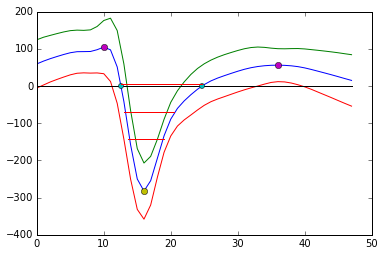

In [125]:

idx = list(sorted(Wavedata.keys()))
idx[0]

print('keys: ',Wavedata[idx[0]].keys())

print('parnames: ',Wavedata[idx[0]].parnames)

print('firstidx: ' ,idx[0])

print('number of idx: ',len(idx))

#print('params: ',Wavedata[idx[0]].params)

print(Wavedata.keys())

neuron=0



electrode = Wavedata[idx[neuron]].electrodemax

plot(Wavedata[idx[neuron]].bigwave)
plot(Wavedata[idx[neuron]].bigwave+Wavedata[idx[neuron]].bigwavestd)
plot(Wavedata[idx[neuron]].bigwave-Wavedata[idx[neuron]].bigwavestd)

plot([0,47],[0,0],'k')

width = Wavedata[idx[neuron]].params[0]
cross = Wavedata[idx[neuron]].params[1]
crossrel = Wavedata[idx[neuron]].params[2]
peaksV = Wavedata[idx[neuron]].params[3]
peaks = Wavedata[idx[neuron]].params[4]
peaksrel = Wavedata[idx[neuron]].params[5]
mins = Wavedata[idx[neuron]].params[6]

plot(cross,[0,0],'o',markersize=5)
plot(peaks,np.array(peaksV)*mins[1],'o')
plot(mins[0],mins[1],'o')

plot([cross[0],cross[0]+width[0]],[5,5],'r')
plot([cross[0]+0.5,cross[0]+width[1]+0.5],np.array([1,1])*mins[1]/4,'r')
plot([cross[0]+1,cross[0]+width[2]+1],np.array([1,1])*mins[1]/2,'r')


#--------------------------


Wave = Wavedata[idx[neuron]].bigwave

#I get the minimum
minimo = min(Wave)
minim = where(Wave== minimo)[0][0]
table_max = where(numpy.r_[False, Wave[1:] > Wave[:-1]] & numpy.r_[Wave[:-1] > Wave[1:], False])[0]


#have to get local max before minimum and after minimum
tablebefore = table_max[where(table_max<minim)]
tableafter = table_max[where(table_max>minim)]

peak1 =  Wave[table_max[Wave[table_max] == max(Wave[tablebefore])]]/minimo

peak2 =  table_max[Wave[table_max] == max(Wave[tableafter])]

a = peak2

print(a)
#wave0 = Wavedata[idx[0]]
#wave0.bigwave
#print(wave0.waves.shape)
#wave0.params

np.array(peaksV)*mins[1]

print(peaks)